**Brief Honor Code**. Do the homework on your own. You may discuss ideas with your classmates, but DO NOT copy the solutions from someone else or the Internet. If stuck, discuss with TA.

**1**. (10 points) 

Rewrite the following code into functional form using lambdas, map, filter and reduce.

In [1]:
n = 10
s = 10
for i in range(n):
    if i % 2:
        s |= i**2
s

123

In [2]:
from functools import reduce
import numpy as np

n = 10
s = 10
reduce(lambda x,y: x|y**2, np.append(s,list(filter(lambda x: x%2 == 1, np.array(range(n)))))) 


123

**2**. (10 points)

Rewrite the code above as a `toolz` pipeline, using lambdas and curried or partially applied functions as necessary.

In [3]:
import toolz as tz
import toolz.curried as c
from functools import partial, lru_cache

n = 10
s = 10
tz.pipe(
    np.append(s,range(n)),
    #in this case, we want to keep the first value s = 10
    c.filter(lambda x: x%2 == 1 or x == s),
    c.reduce(lambda x,y: x|y**2),
)

123

**3**. (10 points) 

Repeat the Buffon's needle simulation from Lab01 as a function that takes the number of needels `n` as input and returns the estimate of $\pi$. The function should use `numpy` and vectorization.  What is $\pi$ for 1 million needles?

In [4]:
def buffonFast(n):
    """
    Simulate the pi using buffon needle
    n is number of simulation
    """
    d = 5
    l = 2
    xtip  = np.random.uniform(0,d/2.0,n) - (l/2.0)*np.cos(np.random.uniform(0,np.pi/2,n))
    total = np.sum(xtip < 0)
    est_pi = 2.0 *l*n/(d * total)
    return est_pi

In [5]:
buffonFast(10**6)

3.141307804971905

**4**. (20 points) 

Simpsons rule is given by the follwoing approximation

![Simpsons](https://wikimedia.org/api/rest_v1/media/math/render/svg/a0cdf0804bb8810e4438cbea898dc7a2fedb3e57)

- Write Simpsons rule as a function `simpsons(f, a, b, n=100)` where n is the number of equally spaced intervals from `a` to `b`.  (10 points)
- Use this function to estimate the probability mass of the standard normal distribution between -1 and 1. Implement the PDF of the standard normal distribution $\psi(x)$ as a function. (10 points)

$$
\psi(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}
$$

In [6]:
def normal(x):
    """
    calculate standard normal pdf
    x is the observation
    """
    d = np.exp(-x**2/2)/np.sqrt(2*np.pi)
    return d



def simpsons(f,a,b, n = 100):
    """
    'calculate' cdf for specified distribution using simpson method
    f is the function you want to cdf for
    a is the lower end of the value
    b is the upper end of the value
    n is number of equally spaced intervals from a to b
    """
    #create 100 equal spaces
    index  = np.linspace(a, b, n+1)
    #calculate h and different parts of sum
    h = (b-a) / n
    fx0 = f(index[0])
    f2sum = np.sum([f(index[i]) for i in np.arange(2,n,2)])
    f3sum = np.sum([f(index[i]) for i in np.arange(1,n+1,2)])
    fxn = f(index[n])
    totalsum = h/3 *(fx0 + 2*f2sum + 4 * f3sum + fxn)
    
    return totalsum
    

In [7]:
simpsons(normal,-1,1, 100)

0.68268949299754922

**5**. (50 points)

Write code to generate a plot similar to the following 

![automata](./automata1d.png)

using the explanation for generation of 1D Cellular Automata found [here](http://mathworld.wolfram.com/ElementaryCellularAutomaton.html). You should only need to use standard Python, `numpy` and `matplotllib`.

The input to the function making the plots should be a simple list of rules

```python
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]
make_plots(rules, niter, ncols)
```

You may, of course, write other helper functions to keep your code modular.

In [8]:
from matplotlib.ticker import IndexLocator
import matplotlib.pyplot as plt

def make_plots(rules, niter = 15, ncols = 3):
    """Run a Cellular Automata for specified niteriation for a given rule.
       Rule can be the subset of the list [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
                                           150, 158, 182, 188, 190, 220, 222, 250]
      niter can be any positive value
      ncols should be divisor of 18
    """
    
    def make_grid(rule, niter):
        """
        Reference: http://www.credid.io/cellular-automata-python.html
                   https://rosettacode.org/wiki/Elementary_cellular_automaton
                   
        creating grid for map using specified rule and iteriation
        """
        mapper = dict(zip(range(7, -1, -1), map(int, list(bin(rule)[2:].zfill(8)))))
        init = np.zeros(niter*2+1, 'int')
        init[(niter*2+1)//2] = 1
        grid = np.zeros((niter, len(init)), 'int')
        grid[0] = init
        old = np.r_[init[-1:], init, init[0:1]]
        for i in range(1, niter):
            nbrs = zip(old[0:], old[1:], old[2:])
            cells = (int(''.join(map(str, nbr)), base=2) for nbr in nbrs)
            new = np.array([mapper[cell] for cell in cells])
            grid[i] = new
            old = np.r_[new[-1:], new, new[0:1]]
        return grid
    
    def plot_grid(rule, grid, ax):
        """
        Reference: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.imshow.html
                   https://matplotlib.org/api/ticker_api.html
                   https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
        Drawing grid with different "style/layer"
        """
        ax.grid(True, color='grey')
        ax.imshow(grid)
        ax.xaxis.set_major_locator(IndexLocator(1, 0))
        ax.yaxis.set_major_locator(IndexLocator(1, 0))
        ax.tick_params(axis = 'both', which = 'both', bottom = 'off',
                      top = 'off', labelbottom = 'off', right = 'off',
                      left = 'off', labelleft = 'off')
        ax.set_title('Rule %d' % rule)
        
    rules = rules.reshape((-1, ncols))

    nrows, ncols = rules.shape
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*3, nrows*2))
    
    
    for i in range(nrows):
        for j in range(ncols):
            grid = make_grid(rules[i, j], niter)
            plot_grid(rules[i, j], grid, ax=axes[i,j])
    
    plt.tight_layout()

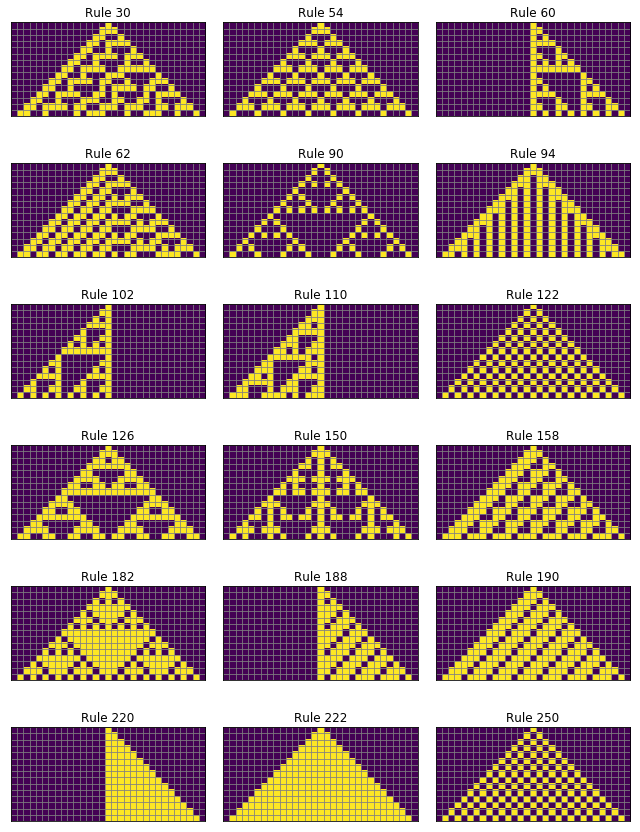

In [9]:
make_plots(rules = np.array([30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
                  150, 158, 182, 188, 190, 220, 222, 250]))